In [2]:
pwd

'/home/wsuser/work'

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wZOj2nphgtbOsk5jSKQmUp3S7yBcWGadykwfiVe_GNNa',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystem-donotdelete-pr-rkbzprzkwy0tvr'
object_key = 'conversion.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255 ,shear_range=0.2,horizontal_flip=True)
test_datagen =ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Dataset/training_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


In [7]:
x_test=test_datagen.flow_from_directory('/home/wsuser/work/Dataset/test_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Dropout,Flatten

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=512,activation='relu'))

In [14]:
model.add(Dense(units=9,activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit_generator(x_train,steps_per_epoch=52,epochs=10,validation_data=x_test,validation_steps=7)

/tmp/wsuser/ipykernel_164/3904431139.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=52,epochs=10,validation_data=x_test,validation_steps=7)


Epoch 1/10
52/52 [==============================] - 64s 1s/step - loss: 0.4263 - accuracy: 0.8762 - val_loss: 0.2100 - val_accuracy: 0.9581
Epoch 2/10
52/52 [==============================] - 65s 1s/step - loss: 0.0200 - accuracy: 0.9963 - val_loss: 0.1805 - val_accuracy: 0.9562
Epoch 3/10
52/52 [==============================] - 64s 1s/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 0.1700 - val_accuracy: 0.9643
Epoch 4/10
52/52 [==============================] - 64s 1s/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.1741 - val_accuracy: 0.9676
Epoch 5/10
52/52 [==============================] - 65s 1s/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.1516 - val_accuracy: 0.9762
Epoch 6/10
52/52 [==============================] - 66s 1s/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.1565 - val_accuracy: 0.9762
Epoch 7/10
52/52 [==============================] - 63s 1s/step - loss: 5.6916e-04 - accuracy: 1.0000 - val_loss: 0.1694 - val_accuracy: 0.9752
Epoch 8/10
52/52

In [17]:
model.save('communication.h5')

In [38]:
!tar -zcvf Real-Communication.tgz communication.h5

communication.h5


In [39]:
ls

communication.h5  Dataset/  Real-Communication.tgz


Test the model

In [18]:
from keras.models import load_model
import numpy as np
import cv2

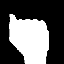

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'/home/wsuser/work/Dataset/test_set/A/1.png', target_size=(64,64))
img

In [20]:
x=image.img_to_array(img)

In [21]:
x.ndim

3

In [22]:
x=np.expand_dims(x,axis=0)
x.ndim

4

In [23]:
model=load_model('communication.h5')

## IBM Deployment

In [24]:
!pip install ibm_watson_machine_learning

In [25]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"eXY62lzE_ho7JCM9rlh1j2Zf38HxkP9T6MINnLAZjfob"
}

client=APIClient(wml_credentials)

In [26]:
def guid_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [33]:
space_uid=guid_space_name(client,'RTCS')
print("Space UID "+space_uid)

Space UID de083065-f0af-4cf1-a229-1958d156c0d0


In [34]:
client.set.default_space(space_uid)

'SUCCESS'

In [35]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [36]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [40]:
model_details = client.repository.store_model(model="Real-Communication.tgz", meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)

In [41]:
model_id

'93c49d57-5be5-400b-a192-341cb0f46be0'